# Predicting HDB Resale Prices in Singapore II
## Exploratory Data Analysis

In this part, we made use of publicly available datasets to generate a list of HDB resale flats and some amenities near them. In thos part, we will examine the variables in detail, in hope of gaining some insights into our data.

---

### Importing Necessary Packages

In this part, we will mostly be using Matplotlib and Seaborn to generate graphs to examine the dataset.

In [155]:
# Importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")
sns.set_palette("deep", n_colors=25)

In [23]:
# Importing dataset

resale_df = pd.read_csv('data/resale_prices.csv')

In [3]:
# Examining dataset

resale_df.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block,address,r_address,latitude,longitude,nearest_mrt,nearest_mrt_dist,nearest_pri_sch,nearest_pri_sch_dist,nearest_sec_sch,nearest_sec_sch_dist,nearest_mall,nearest_mall_dist,quarter,inflation_price
0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,61 years 04 months,1979,10 TO 12,1,406,406 ANG MO KIO AVENUE 10,406 ANG MO KIO AVENUE 10,1.362005,103.853880,ANG MO KIO MRT STATION,1.000002,TOWNSVILLE PRIMARY SCHOOL,0.218124,DEYI SECONDARY SCHOOL,0.465777,AMK Hub,1.014089,2017Q1,253657.953698
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,2017-01,60 years 07 months,1978,01 TO 03,2,108,108 ANG MO KIO AVENUE 4,108 ANG MO KIO AVENUE 4,1.370966,103.838202,MAYFLOWER MRT STATION,0.190030,ANG MO KIO PRIMARY SCHOOL,0.241601,MAYFLOWER SECONDARY SCHOOL,0.434455,Broadway Plaza,0.869109,2017Q1,273338.312175
2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,2017-01,62 years 05 months,1980,01 TO 03,3,602,602 ANG MO KIO AVENUE 5,602 ANG MO KIO AVENUE 5,1.380709,103.835368,LENTOR MRT STATION,0.532151,MAYFLOWER PRIMARY SCHOOL,0.506847,PRESBYTERIAN HIGH SCHOOL,0.789393,Broadway Plaza,1.525833,2017Q1,286458.551159
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,2017-01,62 years 01 month,1980,04 TO 06,4,465,465 ANG MO KIO AVENUE 10,465 ANG MO KIO AVENUE 10,1.366201,103.857201,ANG MO KIO MRT STATION,0.945591,TECK GHEE PRIMARY SCHOOL,0.691887,DEYI SECONDARY SCHOOL,0.518707,myVillage At Serangoon Garden,0.894047,2017Q1,289738.610906
4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,2017-01,62 years 05 months,1980,01 TO 03,5,601,601 ANG MO KIO AVENUE 5,601 ANG MO KIO AVENUE 5,1.381041,103.835132,LENTOR MRT STATION,0.498418,MAYFLOWER PRIMARY SCHOOL,0.546442,PRESBYTERIAN HIGH SCHOOL,0.811047,Broadway Plaza,1.569570,2017Q1,289738.610906


---

### Formatting Variables

Before we start exploring the dataset, there are some additional treatments on certain features that we have to do.
* For remaining_lease, it is currently given as a string of 'xx years and xx months'. Since this is a continuous variable, we would like to convert this into a float value. We will be changing the number of months into a decimal by using 12 months as a base.
* For storey_range, it is currently given in intervals of stories. Since this is a numeric variable, we would also like to convert this to an integar value. We will be taking the average storey of the interval.

In [4]:
# Function to convert remaining_lease to float

def get_remaining_lease(lease):
    parts = lease.split(' ')
    if len(parts) == 2:
        return float(parts[0])
    else:
        return float(parts[0]) + (float(parts[2]) / 12)

In [24]:
# Converting and appending new float value to dataset

resale_df['lease_deci'] = resale_df['remaining_lease'].apply(get_remaining_lease)

In [25]:
# There is one value of remaining_lease that is 0

resale_df[resale_df['remaining_lease'] == '00 years']

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block,address,r_address,latitude,longitude,nearest_mrt,nearest_mrt_dist,nearest_pri_sch,nearest_pri_sch_dist,nearest_sec_sch,nearest_sec_sch_dist,nearest_mall,nearest_mall_dist,quarter,inflation_price,lease_deci
85126,ANG MO KIO,3 ROOM,New Generation,73.0,ANG MO KIO AVE 3,310000.0,2020-12,00 years,1979,01 TO 03,85127,425,425 ANG MO KIO AVENUE 3,425 ANG MO KIO AVENUE 3,1.369154,103.851747,ANG MO KIO MRT STATION,0.258439,JING SHAN PRIMARY SCHOOL,0.310815,DEYI SECONDARY SCHOOL,0.360186,AMK Hub,0.364822,2020Q4,328631.426498,0.0


In [26]:
# Using the typical 99 year lease for HDB flats, we will manually input a value for remaining_lease

resale_df.loc[85126, 'lease_deci'] = 58.0

HDB flats in Singapore are sold to oweners with a 99 year lease. This means that the remaining lease is just equal to the difference between the current year and 99 years from the lease commence date. As such, we would expect the lease_deci variable we created to be strongly correlated with lease_commence_date. As such, from this point on, we will only consider the remaining lease of the flat, and drop the lease commence date.

In [6]:
# Function to convert storey range to average storey

def get_mid_storey(stories):
    low, high = stories.split(' TO ')
    mid = (int(high) + int(low)) // 2
    return mid

In [27]:
resale_df['mid_storey'] = resale_df['storey_range'].apply(get_mid_storey)

---

### Correlation Matrix

We start by dropping variables that we are not looking to keep for analysis. These would include the id, address, latitude/longitude, and names of nearest amenities.

Firstly, we can examine the correlation matrix between the variables, to study any possible relationships between them.

In [28]:
# Dropping variables not used for analysis

resale_df.drop(['street_name', '_id', 'resale_price', 'block', 'lease_commence_date', 'address', 'r_address', 'latitude', 'longitude', 'nearest_mrt', 'nearest_pri_sch', 'nearest_sec_sch', 'nearest_mall', 'quarter'], axis=1, inplace=True)

In [29]:
# Obtaining list of numerical features in the dataset

numerical_features = [feature for feature in resale_df.columns if resale_df[feature].dtype != 'O']

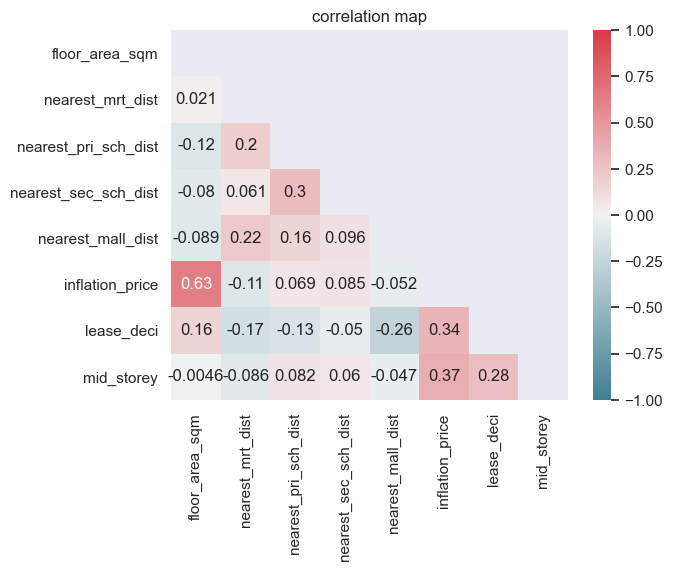

In [50]:
# Plotting correlation matrix for numerical features

corrs = resale_df[numerical_features].corr()
mask = np.triu(np.ones_like(corrs, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrs, vmin=-1, vmax=1, annot=True, mask=mask, cmap=cmap)
plt.title('correlation map')
plt.show()

### Floor Area and Flat Type

One of the most immediate factors that determine the price of a flat is how big the flat is. In Singapore, flats are categorised based on their floor area into '1-room', '2-room', etc. Naturally, we would expect flats with a bigger floor area to fetch a larger price. This is backed up by a strong correlation of 0.63 as seen in the correlation matrix.

By plotting floor area against resale price, we can confirm some expected results.
* The categorisation for flat sizes is as expected (i.e. 1 room flats are the smallest, followed by 2 room flats, etc). There also seem to be some 3 room flats that are much larger than executive and multi-generation flats, which is counter-intuitive. This could be useful when we deal with outliers.
* The hypothesis that larger flats are more expensive is also observed.

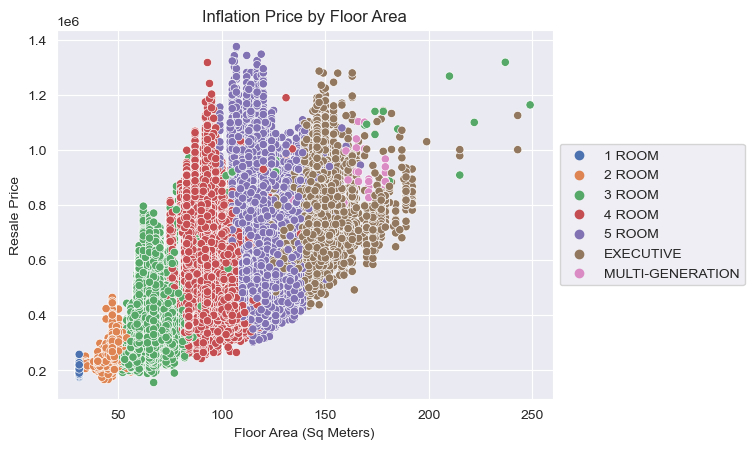

In [92]:
# Examining the relationship between flat type/floor area and resale price

ax = sns.scatterplot(data=resale_df, x='floor_area_sqm', y='inflation_price', hue='flat_type', hue_order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])
ax.set(xlabel='Floor Area (Sq Meters)', ylabel = 'Resale Price', title='Inflation Price by Floor Area')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

We can also examine the distribution of house types among resale flats. We see that most of the flats sold are either 3, 4, or 5 room flats. This is to be expected, as majority of flats built in Singapore are in these categories. On the other hand, very little 1 room and multi-generation flats were sold, as these flats are more rare.

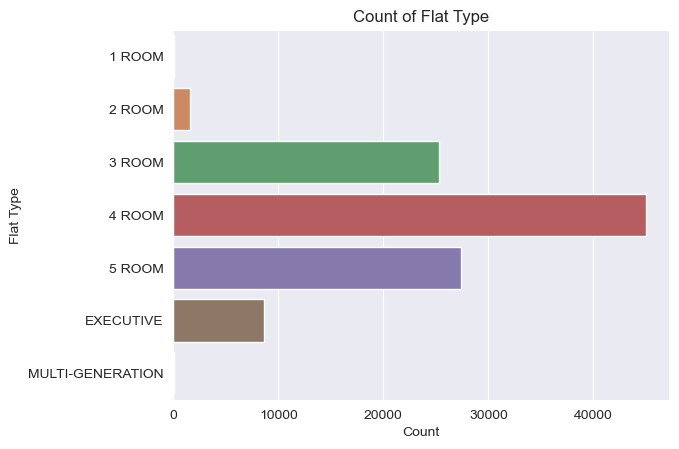

In [91]:
# Examining the distribution of resale flat types

ax = sns.countplot(data=resale_df, y='flat_type', order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])
ax.set(xlabel='Count', ylabel='Flat Type', title='Count of Flat Type')
plt.show()

Following what we observed about larger floor areas leading to higher price, we would expect larger flat types, such as 5 room and executive flats to have higher resale prices. However, it would be unwise for use to remove flat types and use floor area exclusively in our model. This is because different flat types differ in other ways as well. For example, a 3 room flat only has 2 bedrooms, while a 4 room or 5 room flat has 3 bedrooms.  These differences are also considerations for people looking to buy flats: for e.g. if you have a few children you would consider getting a 4 room or 5 room flat instead of a 3 room, so that your children can have their separate bedrooms. Since these details are not present in the dataset explicitly, we will keep flat type as a feature to distinguish between these flats.

We can also examine the effect of flat type on resale price. We see a clear cut relationship between flat types and resale price. Small 1 room flats have the lowest resale price, while large multi-generation flats have the highest resale price.

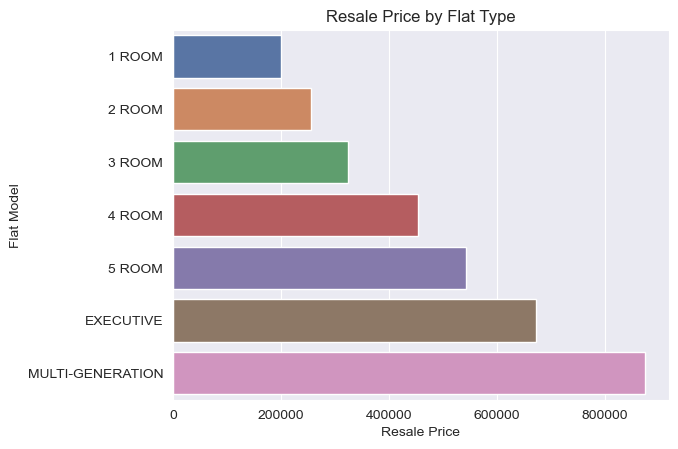

In [98]:
# Examining effect of flat type on median resale price

temp_df = resale_df.copy()
temp_df = temp_df.groupby('flat_type', as_index=False)['inflation_price'].median()
ax = sns.barplot(data=temp_df, x='inflation_price', y='flat_type', order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])
ax.set(xlabel='Resale Price', ylabel='Flat Model', title='Resale Price by Flat Type')
plt.show()

### Model Type

Flat model roughly refers to the layout of the house. Certain models are being used today, such as Improved, Model A. Other models are obsolete and no longer being built, such as Standard and Mansionettes. This can be confirmed by doing a plot of the different flat models and the remaining lease. Flat models that are obsolete will have shorter leases remaining, since they were built earlier, while flats that are still being built will have longer leases remaining.

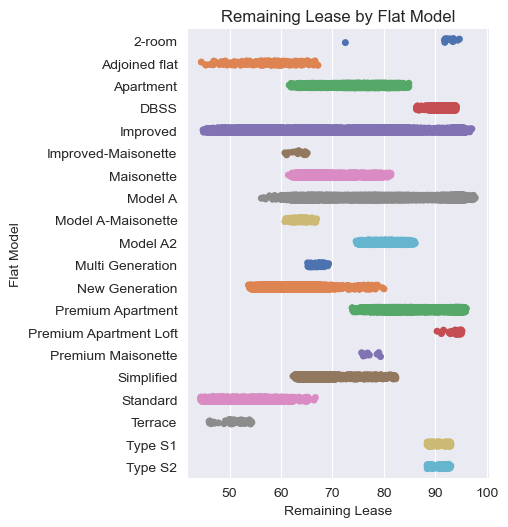

In [156]:
# Examining the remaining lease of various flat models

ax = sns.catplot(data=resale_df, x='lease_deci', y='flat_model', order=np.sort(resale_df['flat_model'].unique()))
ax.set(xlabel='Remaining Lease', ylabel='Flat Model', title='Remaining Lease by Flat Model')
plt.show()

The same flat type can have different flat models, and vice versa. Since we saw earlier that flat types affect resale price, we can see whether flat model also has an effect on resale price. One way to do this would be independent of flat types, i.e. for the same flat type, we see if different flat models have an effect on resale price.

By constructing a pivot table between flat types and flat models, we see that for 1 room and multi-generation flats, there is only one flat model. When examining the effect of flat models, we would naturally exclude these flat types.

In [152]:
# Examining counts of flat types and flat models

temp_df = resale_df.copy()
temp_df = resale_df[['flat_model', 'flat_type']]
flat_model_by_type = pd.pivot_table(temp_df, index='flat_model', columns='flat_type', aggfunc='size', fill_value='')

In [153]:
flat_model_by_type

flat_type,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI-GENERATION
flat_model,,,,,,,
2-room,,12.0,,,,,
Adjoined flat,,,,17.0,117.0,72.0,
Apartment,,,,,,4350.0,
DBSS,,1.0,250.0,802.0,974.0,,
Improved,48.0,296.0,6420.0,1249.0,19044.0,,
Improved-Maisonette,,,,,18.0,,
Maisonette,,,,,,3253.0,
Model A,,937.0,6426.0,26620.0,1443.0,,
Model A-Maisonette,,,,,193.0,,


We also see that there are certain flat models, such as DBSS and Premium Apartment Loft, that fetch high resale prices regardless of flat type. DBSS flats were built by private developers and can be considered as 'premium' HDB flats. Apartment lofts are rare flat models that have a unique and appealing layout. These flats are often more highly valued, and this is reflected in the higher resale price.

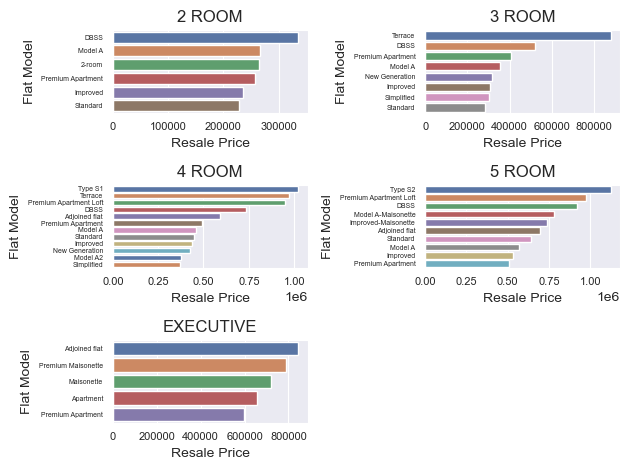

In [157]:
# Examining the relationship between flat model and resale price for each flat type

fig, axes = plt.subplots(nrows=3, ncols=2)
flat_types = ['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']
fig.delaxes(axes[2,1])

for ty, ax in zip(flat_types, axes.flat):
    temp_df = resale_df.copy()
    temp_df = temp_df[temp_df['flat_type'] == ty]
    temp_df = temp_df.groupby('flat_model', as_index=False)['inflation_price'].median()
    temp_df.sort_values(by='inflation_price', ascending=False, inplace=True)
    sns.barplot(data=temp_df, x='inflation_price', y='flat_model', order=temp_df['flat_model'], ax=ax)
    ax.set(xlabel='Resale Price', ylabel='Flat Model', title=ty)
    ax.tick_params(axis='y', labelsize=5)
    ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()
plt.show()